# Lab 5 - Student Survey


Here we will load in the data and display it first. We have removed 2 rows as they had no entries.

In [1]:
# YOUR CODE HERE
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv('Survey.csv')

df = df.iloc[2:]
df

,Unnamed: 0,1. What are your reasons\nfor taking course?,2. Are you a \ntransfer student?,3. What year of study \nare you in?,4. Are you familiar \nwith Python?,5. Are you familiar\nwith Github?,6. Are you familiar\nwith SQL?,7. Are you familiar \nwith JupyterLab?,8. Are you familiar\nwith Anaconda?,9. Which of the following courses have you taken?,...,"17. What is your preferred \n""go to"" programming language?",18.When did you begin \nlearning how to program?,19. How did you begin \nprogramming,20. Do you like playing \nsports / working out?,21. How many days a \nweek do you work out?,22. What is your gender?,23. Do you like \nlistening to music?,24. What type of music do \nyou prefer listening to?,25. Do you like reading,26. What genre of books \ndo you like to read (if you had to)
2,1.0,NaN,2.0,3.0,1.0,2.0,1.0,0.0,1.0,NaN,...,C++,First year in college,Introductory course in college,No,0.0,Male,Yes,Rock,Yes,Fantasy
3,2.0,NaN,2.0,4.0,0.0,1.0,0.0,0.0,0.0,4,...,C++,First year of College,Online Tutorials,Yes,3.0,Female,Yes,Classical,Yes,Detective/Mystery
4,3.0,NaN,2.0,4.0,0.0,1.0,0.0,1.0,0.0,4 (Concurrently),...,C++,First year of College,Introductory course in college,Yes,0.0,Male,Yes,Classical,Yes,Nonfiction
5,4.0,NaN,1.0,3.0,3.0,3.0,1.0,1.0,1.0,NaN,...,Python,9th grade,High School course,Yes,5.0,Male,Yes,Hiphop,Yes,Detective/Mystery
6,5.0,NaN,2.0,4.0,1.0,3.0,2.0,0.0,0.0,4,...,Javascript,Second year of college,Introductory course in college,Yes,3.0,Male,Yes,Metal,Yes,Detective/Mystery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,61.0,NaN,2.0,3.0,1.0,1.0,0.0,0.0,0.0,NaN,...,Rust,Second year of college,Introductory course in college,Yes,4.0,Male,Yes,Hiphop,Yes,Scifi
63,62.0,NaN,1.0,2.0,1.0,2.0,0.0,1.0,0.0,NaN,...,C++,10th grade,High school course,Yes,3.0,Male,Yes,Hiphop,No,Detective/Mystery
64,63.0,NaN,2.0,3.0,0.0,1.0,0.0,0.0,0.0,NaN,...,C++,First year of college,Intrductory course in college,Yes,0.0,Male,Yes,Hiphop,Yes,Historical Fiction
65,64.0,NaN,2.0,4.0,2.0,1.0,3.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Question 1

This table gives us responses from all the students in the class about things such as their reasons for taking the course, how familar they are with Python, etc. A lot of the questions are geared around the students and their tecnhical familiarity with some personality preference questions thrown in as well.


# Question 2

We would like to know if, in our class, there exists a correlation between students with a higher familiarity with Python and students with a higher familiarity with GitHub.

# Question 3

We will first pre-process our data. We can replace all NaNs with "" with 0 for data since we have numbers as data entries. We will convert these numbers from strings to int.

In [2]:
python_fam = df.iloc[:,4].replace(np.nan, 0, regex = True).apply(int)
github_fam = df.iloc[:,5].replace(np.nan, 0, regex = True).apply(int)

github_fam

2     2
3     1
4     1
5     3
6     3
     ..
62    1
63    2
64    1
65    1
66    3
Name: 5. Are you familiar\nwith Github?, Length: 65, dtype: int64

We can then first make a scatter plot to show what everyone's first language was:


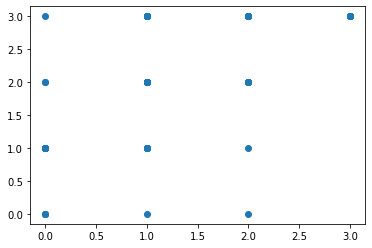

In [3]:
plt.scatter(python_fam, github_fam)

There seems to be no clear correlation here - it seems we have too little data to make a conclusion from just looking at the scatter plot.

{'whiskers': [<matplotlib.lines.Line2D at 0x11ef1fb80>,
 'caps': [<matplotlib.lines.Line2D at 0x11ef2b280>,
 'boxes': [<matplotlib.lines.Line2D at 0x11ef1f820>],
 'medians': [<matplotlib.lines.Line2D at 0x11ef2b940>],
 'fliers': [<matplotlib.lines.Line2D at 0x11ef2bc40>],
 'means': []}

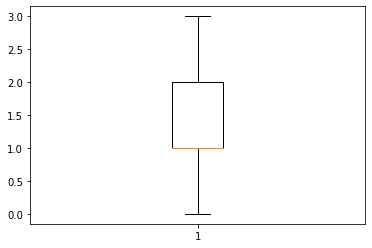

In [4]:
plt.boxplot(python_fam)

{'whiskers': [<matplotlib.lines.Line2D at 0x11ef85b50>,
 'caps': [<matplotlib.lines.Line2D at 0x11ef93250>,
 'boxes': [<matplotlib.lines.Line2D at 0x11ef857f0>],
 'medians': [<matplotlib.lines.Line2D at 0x11ef93910>],
 'fliers': [<matplotlib.lines.Line2D at 0x11ef93c10>],
 'means': []}

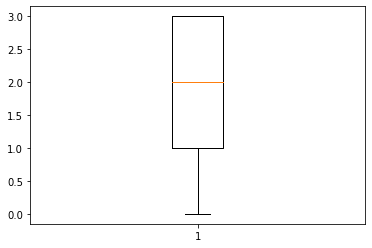

In [5]:
plt.boxplot(github_fam)

There is a greater spread of the data for people's familiarity with Python. It seems that people are more in the midddle with their familiarity with Python but with GitHub it seems to be that mostly everyone is more familiar with it - if 3 means more familiar.

<BarContainer object of 4 artists>

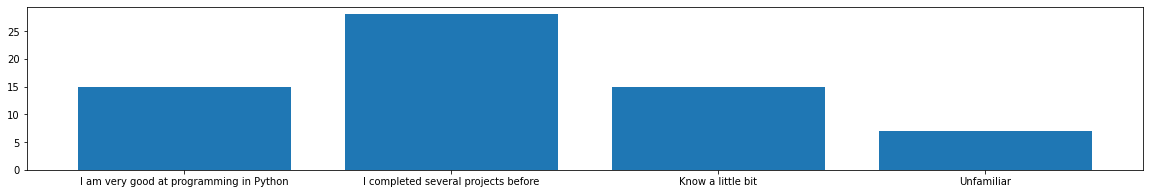

In [6]:
dicta = {0: 0, 1: 0, 2 : 0, 3: 0}

num = 0


for i in python_fam:
    dicta[i] += 1
    
label = ['I am very good at programming in Python', 'I completed several projects before',
        'Know a little bit', 'Unfamiliar']
    
plt.figure(figsize = (20, 3))    

plt.bar(label, dicta.values())


<BarContainer object of 4 artists>

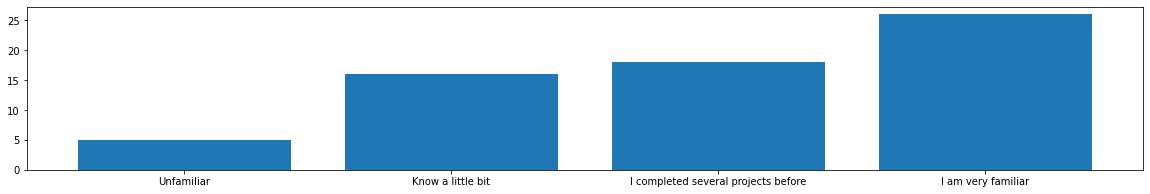

In [7]:
dicta = {0: 0, 1: 0, 2 : 0, 3: 0}

num = 0


for i in github_fam:
    dicta[i] += 1
    
label = ['Unfamiliar', 'Know a little bit', 
         'I completed several projects before', 'I am very familiar']
    
plt.figure(figsize = (20, 3))    

plt.bar(label, dicta.values())

It seems like a lot of people in the class have at least worked with python, but not a lot of people are really well versed in Python. There is only a small amount of people in the class that haven't really worked with GitHub while most of the class have at least a basic understanding of GitHub

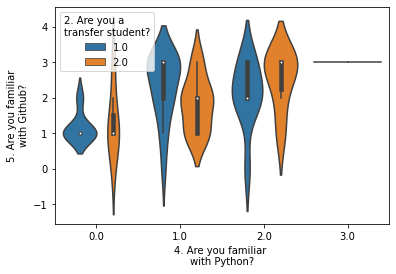

In [8]:
sns.violinplot(data=df, x = '4. Are you familiar \nwith Python?', y = '5. Are you familiar\nwith Github?', 
               hue = '2. Are you a \ntransfer student?')

It seems like there is a trend where students with a basic understanding of github have at least some familiarity with python. Now if we take into account if the students transferred into UCR or not, we can that both types of students tend to have a basic understanding of github if they are familiar with python.

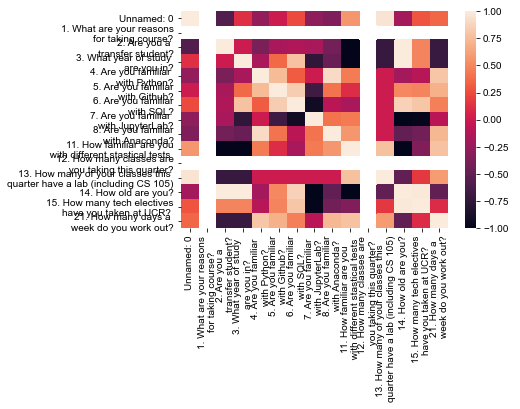

In [9]:
corr = df[2:7].corr()

sns.heatmap(corr)
sns.set(rc={'figure.figsize':(20.7,15.27)})

So this heat map gives us a really good visual on how clustered the data is at the github and python question intersect. From the map we can see that there is a large of amount of responses that are clustered at that intersect and it ,in essence, supports the conclusions that we drew from the violin plot earlier.

# Question 4

Our three hypotheses are that there is a strong positive correlation between familiarity with Python and GitHub. Looking at the violin graph, we suspect there might be a correlation with transfer students having a higher familiarity with Python. Based on the fact that transfer students enter UCR at the same age as third or fourth year student, maybe there is a correlation between year of study and familiarity with Python.

1.) Strong positive correlation between Python and GitHub familiarity.

2.) Negative correlation between being a transfer student and high familiarity with Python.

3.) Positive correlation between year of study and familiarity with Python.

In [10]:
toy_dataset_py = df.iloc[0:5]
toy_dataset_py

,Unnamed: 0,1. What are your reasons\nfor taking course?,2. Are you a \ntransfer student?,3. What year of study \nare you in?,4. Are you familiar \nwith Python?,5. Are you familiar\nwith Github?,6. Are you familiar\nwith SQL?,7. Are you familiar \nwith JupyterLab?,8. Are you familiar\nwith Anaconda?,9. Which of the following courses have you taken?,...,"17. What is your preferred \n""go to"" programming language?",18.When did you begin \nlearning how to program?,19. How did you begin \nprogramming,20. Do you like playing \nsports / working out?,21. How many days a \nweek do you work out?,22. What is your gender?,23. Do you like \nlistening to music?,24. What type of music do \nyou prefer listening to?,25. Do you like reading,26. What genre of books \ndo you like to read (if you had to)
2,1.0,NaN,2.0,3.0,1.0,2.0,1.0,0.0,1.0,NaN,...,C++,First year in college,Introductory course in college,No,0.0,Male,Yes,Rock,Yes,Fantasy
3,2.0,NaN,2.0,4.0,0.0,1.0,0.0,0.0,0.0,4,...,C++,First year of College,Online Tutorials,Yes,3.0,Female,Yes,Classical,Yes,Detective/Mystery
4,3.0,NaN,2.0,4.0,0.0,1.0,0.0,1.0,0.0,4 (Concurrently),...,C++,First year of College,Introductory course in college,Yes,0.0,Male,Yes,Classical,Yes,Nonfiction
5,4.0,NaN,1.0,3.0,3.0,3.0,1.0,1.0,1.0,NaN,...,Python,9th grade,High School course,Yes,5.0,Male,Yes,Hiphop,Yes,Detective/Mystery
6,5.0,NaN,2.0,4.0,1.0,3.0,2.0,0.0,0.0,4,...,Javascript,Second year of college,Introductory course in college,Yes,3.0,Male,Yes,Metal,Yes,Detective/Mystery


In [11]:
toy_corr_py = toy_dataset_py.iloc[:, 2:6].corr()
toy_corr_py

,2. Are you a \ntransfer student?,3. What year of study \nare you in?,4. Are you familiar \nwith Python?,5. Are you familiar\nwith Github?
2. Are you a \ntransfer student?,1.000000,0.612372,-0.912871,-0.559017
3. What year of study \nare you in?,0.612372,1.000000,-0.745356,-0.456435
4. Are you familiar \nwith Python?,-0.912871,-0.745356,1.000000,0.816497
5. Are you familiar\nwith Github?,-0.559017,-0.456435,0.816497,1.000000


In [12]:
# Comparing Python familiarity with GitHub

assert(abs(toy_corr_py.iloc[2,3] - 0.816497) <= 0.01), 'Calculated correlation does not match the function'

In [13]:
# Comparing Python familiarity with being you a transfer student

assert(abs(toy_corr_py.iloc[2,0] + 0.912871) <= 0.01), 'Calculated correlation does not match the function'

In [14]:
# Comparing Python familiarity with year of study

assert(abs(toy_corr_py.iloc[2,1] + 0.745356) <= 0.01), 'Calculated correlation does not match the function'

As we can see, there are no assertion errors in our code so we can assume that the corr() function works. The output of the function matches our handwritten results.

In [15]:
df.iloc[:, 2:6].corr()

,2. Are you a \ntransfer student?,3. What year of study \nare you in?,4. Are you familiar \nwith Python?,5. Are you familiar\nwith Github?
2. Are you a \ntransfer student?,1.000000,0.090711,-0.127947,-0.127437
3. What year of study \nare you in?,0.090711,1.000000,0.219102,0.380215
4. Are you familiar \nwith Python?,-0.127947,0.219102,1.000000,0.510739
5. Are you familiar\nwith Github?,-0.127437,0.380215,0.510739,1.000000


We see that there is a positive correlation between GitHub and Python familiarity. However our hypothesis stated that there is a strong positive correlation, which there is not. The correlation is simply positive, and is neither strong nor weak. From the results, we can say that familiarity with GitHub aligns with python familiarity.

We see that there is a weak negative correlation between Python familiarity and being a transfer student. Our hypothesis stated that there was a negative correlation between the two. We can assume from the result that if you are a transfer student you are more familiar with python.

We see that there is a weak positive correlation between Python familiarity and year of study. Our hypothesis stated that there was a positive correlation, but it did not explicitly account for a weak correlation. This result tells us that a greater year of study may yield more python familiarity. 

In [16]:
pd.crosstab(toy_dataset_py['4. Are you familiar \nwith Python?'], toy_dataset_py['5. Are you familiar\nwith Github?'])

5. Are you familiar with Github?,1.0,2.0,3.0
4. Are you familiar with Python?,,,
0.0,2,0,0
1.0,0,1,1
3.0,0,0,1


In [17]:
pd.crosstab(toy_dataset_py['4. Are you familiar \nwith Python?'], toy_dataset_py['5. Are you familiar\nwith Github?'], normalize=True)

5. Are you familiar with Github?,1.0,2.0,3.0
4. Are you familiar with Python?,,,
0.0,0.4,0.0,0.0
1.0,0.0,0.2,0.2
3.0,0.0,0.0,0.2


In [18]:
py_git_dist = pd.crosstab(toy_dataset_py['4. Are you familiar \nwith Python?'], toy_dataset_py['5. Are you familiar\nwith Github?'], normalize=True, margins=True)
py_git_dist

5. Are you familiar with Github?,1.0,2.0,3.0,All
4. Are you familiar with Python?,,,,
0.0,0.4,0.0,0.0,0.4
1.0,0.0,0.2,0.2,0.4
3.0,0.0,0.0,0.2,0.2
All,0.4,0.2,0.4,1.0


In [19]:
assert(abs(py_git_dist.iloc[1,1] - 0.2) <= 0.01), 'Calculated distribution does not match the function'

As we can see, there are no assertion errors in our code so we can assume that the crosstab() function works. The output of the function matches our handwritten results.

In [20]:
pd.crosstab(df['4. Are you familiar \nwith Python?'], df['5. Are you familiar\nwith Github?'], normalize=True)

5. Are you familiar with Github?,0.0,1.0,2.0,3.0
4. Are you familiar with Python?,,,,
0.0,0.015873,0.142857,0.031746,0.015873
1.0,0.015873,0.095238,0.158730,0.174603
2.0,0.015873,0.015873,0.095238,0.111111
3.0,0.000000,0.000000,0.000000,0.111111


In [21]:
pd.crosstab(df['4. Are you familiar \nwith Python?'], df['5. Are you familiar\nwith Github?'], normalize=True, margins=True)

5. Are you familiar with Github?,0.0,1.0,2.0,3.0,All
4. Are you familiar with Python?,,,,,
0.0,0.015873,0.142857,0.031746,0.015873,0.206349
1.0,0.015873,0.095238,0.158730,0.174603,0.444444
2.0,0.015873,0.015873,0.095238,0.111111,0.238095
3.0,0.000000,0.000000,0.000000,0.111111,0.111111
All,0.047619,0.253968,0.285714,0.412698,1.000000


### Analysis

Students are likely to be both profiecient in Python and GitHub, and are also likely to be proficient with GitHub and somewhat experienced in Python.

In [22]:
pd.crosstab(df['4. Are you familiar \nwith Python?'], df['2. Are you a \ntransfer student?'])

2. Are you a transfer student?,1.0,2.0
4. Are you familiar with Python?,,
0.0,6,7
1.0,17,11
2.0,9,6
3.0,5,2


In [23]:
pd.crosstab(df['4. Are you familiar \nwith Python?'], df['2. Are you a \ntransfer student?'], normalize=True)

2. Are you a transfer student?,1.0,2.0
4. Are you familiar with Python?,,
0.0,0.095238,0.111111
1.0,0.269841,0.174603
2.0,0.142857,0.095238
3.0,0.079365,0.031746


In [24]:
pd.crosstab(df['4. Are you familiar \nwith Python?'], df['2. Are you a \ntransfer student?'], normalize=True, margins=True)

2. Are you a transfer student?,1.0,2.0,All
4. Are you familiar with Python?,,,
0.0,0.095238,0.111111,0.206349
1.0,0.269841,0.174603,0.444444
2.0,0.142857,0.095238,0.238095
3.0,0.079365,0.031746,0.111111
All,0.587302,0.412698,1.000000


### Analysis

As the distributions show, there is a higher likelihood that a transfer student will be somewhat familiar or have completed a project in python.

In [25]:
pd.crosstab(df['4. Are you familiar \nwith Python?'], df['3. What year of study \nare you in?'])

3. What year of study are you in?,2.0,3.0,4.0,5.0,6.0
4. Are you familiar with Python?,,,,,
0.0,4,5,4,0,0
1.0,2,11,14,0,1
2.0,3,3,8,0,1
3.0,0,3,3,1,0


In [26]:
pd.crosstab(df['4. Are you familiar \nwith Python?'], df['3. What year of study \nare you in?'], normalize=True)

3. What year of study are you in?,2.0,3.0,4.0,5.0,6.0
4. Are you familiar with Python?,,,,,
0.0,0.063492,0.079365,0.063492,0.000000,0.000000
1.0,0.031746,0.174603,0.222222,0.000000,0.015873
2.0,0.047619,0.047619,0.126984,0.000000,0.015873
3.0,0.000000,0.047619,0.047619,0.015873,0.000000


In [27]:
pd.crosstab(df['4. Are you familiar \nwith Python?'], df['3. What year of study \nare you in?'], normalize=True, margins=True)

3. What year of study are you in?,2.0,3.0,4.0,5.0,6.0,All
4. Are you familiar with Python?,,,,,,
0.0,0.063492,0.079365,0.063492,0.000000,0.000000,0.206349
1.0,0.031746,0.174603,0.222222,0.000000,0.015873,0.444444
2.0,0.047619,0.047619,0.126984,0.000000,0.015873,0.238095
3.0,0.000000,0.047619,0.047619,0.015873,0.000000,0.111111
All,0.142857,0.349206,0.460317,0.015873,0.031746,1.000000


### Analysis

The distribution does not match our hypothesis, as we do not see an increase in the marginal distributions of python familiarity proportial to the increase in marginal distributions of year of study. 

In [28]:
mean_values = toy_dataset_py.iloc[:, 2:6].mean()
mean_values

2. Are you a \ntransfer student?       1.8
3. What year of study \nare you in?    3.6
4. Are you familiar \nwith Python?     1.0
5. Are you familiar\nwith Github?      2.0
dtype: float64

In [29]:
assert(abs(mean_values[0] - 1.8) <= 0.01), 'The returned mean and the calculated mean do not match'

In [30]:
df.iloc[:, 2:6].mean()

2. Are you a \ntransfer student?       1.412698
3. What year of study \nare you in?    3.444444
4. Are you familiar \nwith Python?     1.253968
5. Are you familiar\nwith Github?      2.063492
dtype: float64

If we look at mean in our descriptive table, we can see that on average, the students in this class have pretty much have a good amount of experience in python and the various software that we are using in our labs. This glaring statistic might be attributed that to the fact that these students do not have a really good grasp of github and the project based environment that facilitates professional and technical growth.

There are mostly transfer students in the class, as we can see that the mean is closer to 1 than 2. However, it is probably an almost even split since the mean is so close to 1.5 .

Most students are in their third year of study, since the mean is 3.4 which is closer to 3 than it is to 4.

Most students are either very familiar with python or have completed some projects with python, as we can see from the mean which is very close to 1.

Most students are somewhat familiar with GitHub since the mean is close to 2.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Right click on this page -> Print.. -> Save as .pdf file -> Upload it to GradeScope

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Have the TA check your lab to obtain credit. (Write your name on the blank line of the sign-in sheet)

4. Upload the PDF to Gradescope